# PR曲线

绘制每个类别的PR曲线，计算AP值。

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体
easy

/home/mark/Documents/PythonProject/ShuffleNet-Retrain/ShuffleNetV2+


## 导入工具包

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID -easy

In [4]:
dataset_name = 'test_easy_classes'
model_path = './models/2023-12-14-17:59_max_epoch_100-afterSOD/'
model_name = 'retrain_COME15K_checkpoint-best-avg-0.544-Medium.pth.tar'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入类别名称和ID -hard

In [24]:
dataset_name = 'test_hard_classes'
model_path = './models/2023-12-14-17:59_max_epoch_100-afterSOD/'
model_name = 'retrain_COME15K_checkpoint-best-avg-0.544-Medium.pth.tar'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 载入测试集预测结果表格

In [25]:
df = pd.read_csv(model_path + dataset_name + '-测试集预测结果.csv')

In [26]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,covering-预测置信度,device-预测置信度,domestic_animal-预测置信度,mater-预测置信度,person-预测置信度,plant-预测置信度,structure-预测置信度,vertebrate-预测置信度
0,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,0,covering,3,mater,True,0.150702,0.021558,0.007851,0.031100,0.740860,0.024640,0.017243,0.006046
1,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,3,mater,1,device,2,domestic_animal,False,0.051497,0.143278,0.090627,0.484257,0.086004,0.015017,0.069500,0.059820
2,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,0,covering,3,mater,True,0.285533,0.023308,0.034161,0.054380,0.533188,0.029523,0.017891,0.022016
3,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,4,person,5,plant,0,covering,True,0.111442,0.078068,0.008580,0.065755,0.497820,0.178757,0.039475,0.020102
4,data/SOD-SemanticDataset/test/COME15K-Hard/COM...,0,covering,3,mater,5,plant,1,device,False,0.061014,0.151636,0.040157,0.296459,0.080052,0.205801,0.085705,0.079177


## 绘制某一类别的PR曲线

In [27]:
specific_class = 'covering'

In [28]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [29]:
# 二分类预测置信度
y_score = df[specific_class + '-预测置信度']

In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
AP = average_precision_score(y_test, y_score, average='weighted')

In [31]:
AP

0.21834163519562516

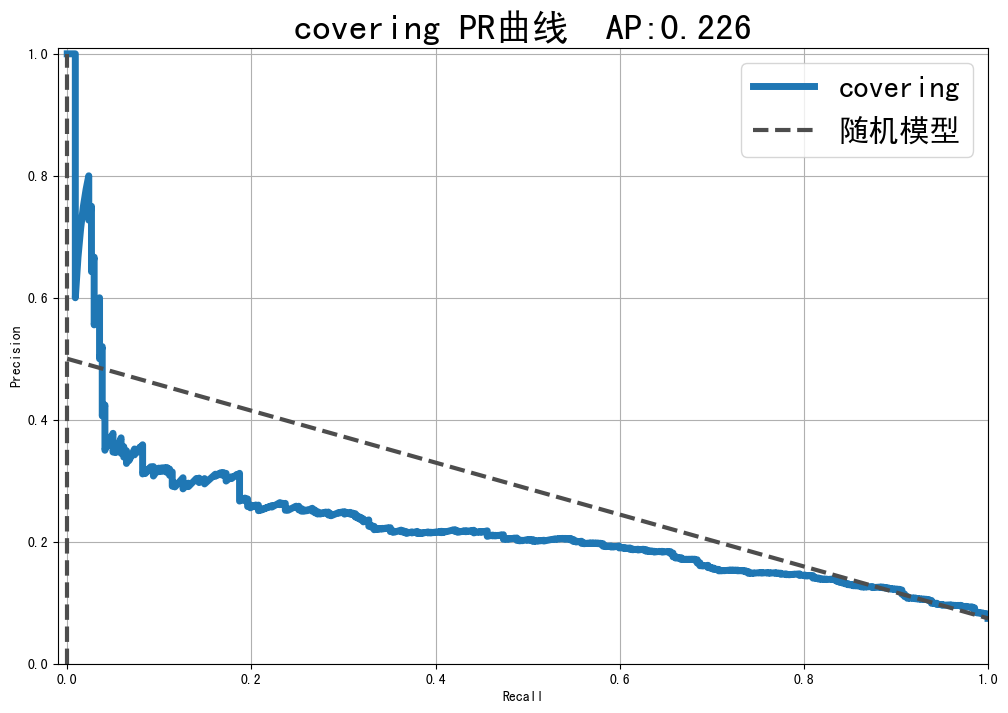

In [12]:
plt.figure(figsize=(12, 8))
# 绘制 PR 曲线
plt.plot(recall, precision, linewidth=5, label=specific_class)

# 随机二分类模型
# 阈值小，所有样本都被预测为正类，recall为1，precision为正样本百分比
# 阈值大，所有样本都被预测为负类，recall为0，precision波动较大
plt.plot([0, 0], [0, 1], ls="--", c='.3', linewidth=3, label='随机模型')
plt.plot([0, 1], [0.5, sum(y_test==1)/len(df)], ls="--", c='.3', linewidth=3)

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} PR曲线  AP:{:.3f}'.format(specific_class, AP))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.savefig('{}-PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

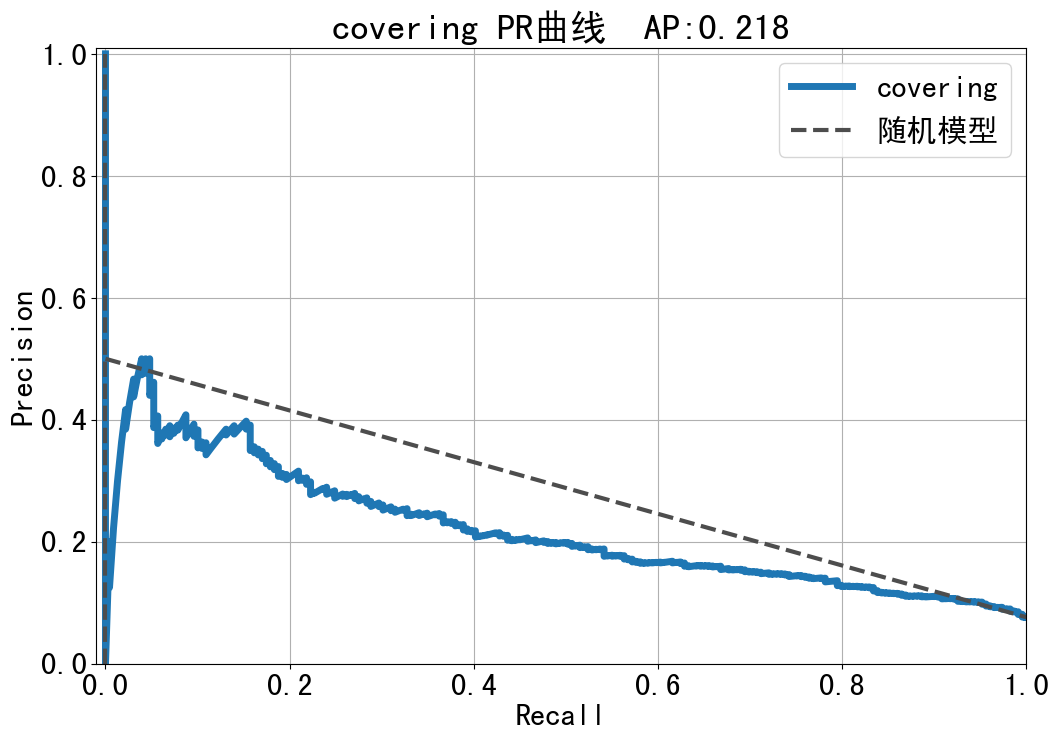

In [32]:
plt.figure(figsize=(12, 8))
# 绘制 PR 曲线
plt.plot(recall, precision, linewidth=5, label=specific_class)

# 随机二分类模型
# 阈值小，所有样本都被预测为正类，recall为1，precision为正样本百分比
# 阈值大，所有样本都被预测为负类，recall为0，precision波动较大
plt.plot([0, 0], [0, 1], ls="--", c='.3', linewidth=3, label='随机模型')
plt.plot([0, 1], [0.5, sum(y_test==1)/len(df)], ls="--", c='.3', linewidth=3)

plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} PR曲线  AP:{:.3f}'.format(specific_class, AP))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.savefig('{}-PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 绘制所有类别的ROC曲线

In [33]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [34]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [35]:
get_line_arg()

{'color': 'seagreen', 'linestyle': '-', 'linewidth': 1}

## easy 数据集

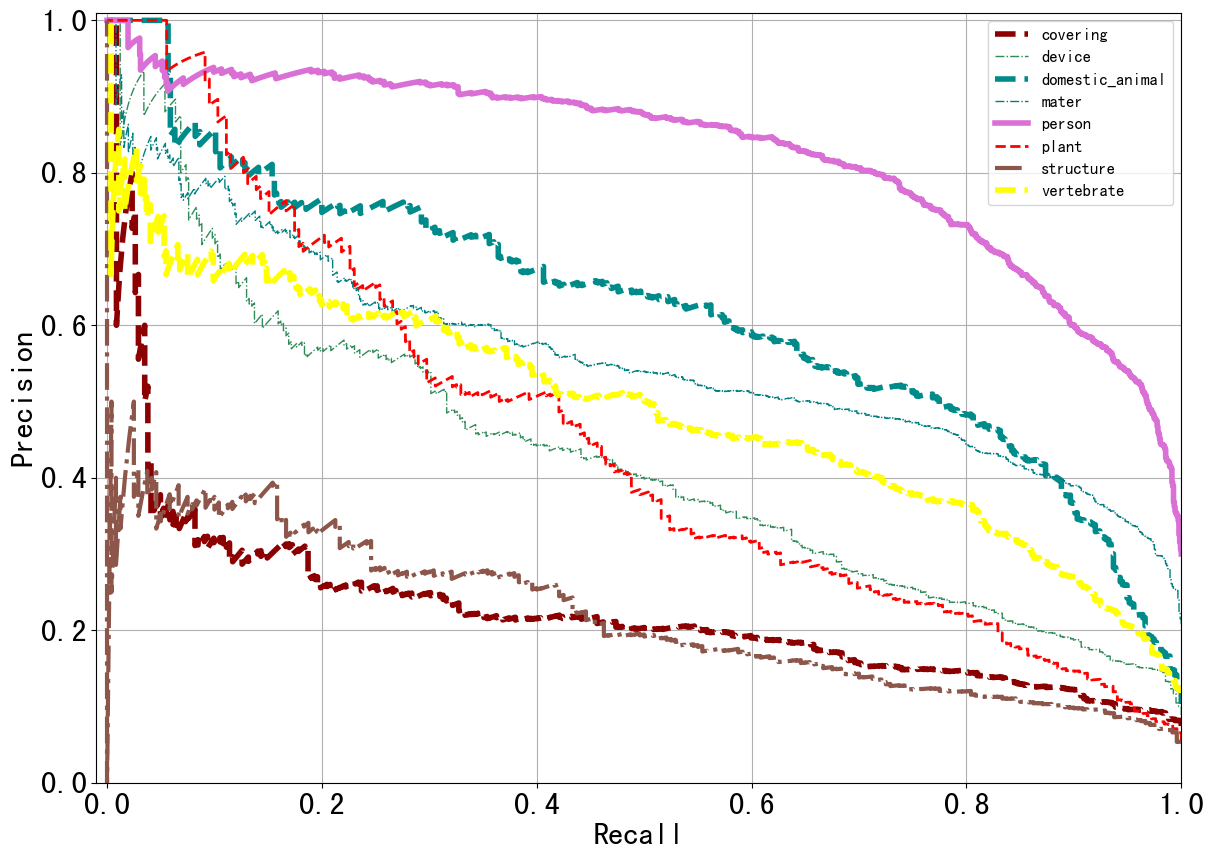

In [16]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
# plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.rcParams['font.size'] = 22
plt.grid(True)

ap_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    AP = average_precision_score(y_test, y_score, average='weighted')
    plt.plot(recall, precision, **get_line_arg(), label=each_class)
    plt.legend()
    ap_list.append(AP)

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## hard 数据集

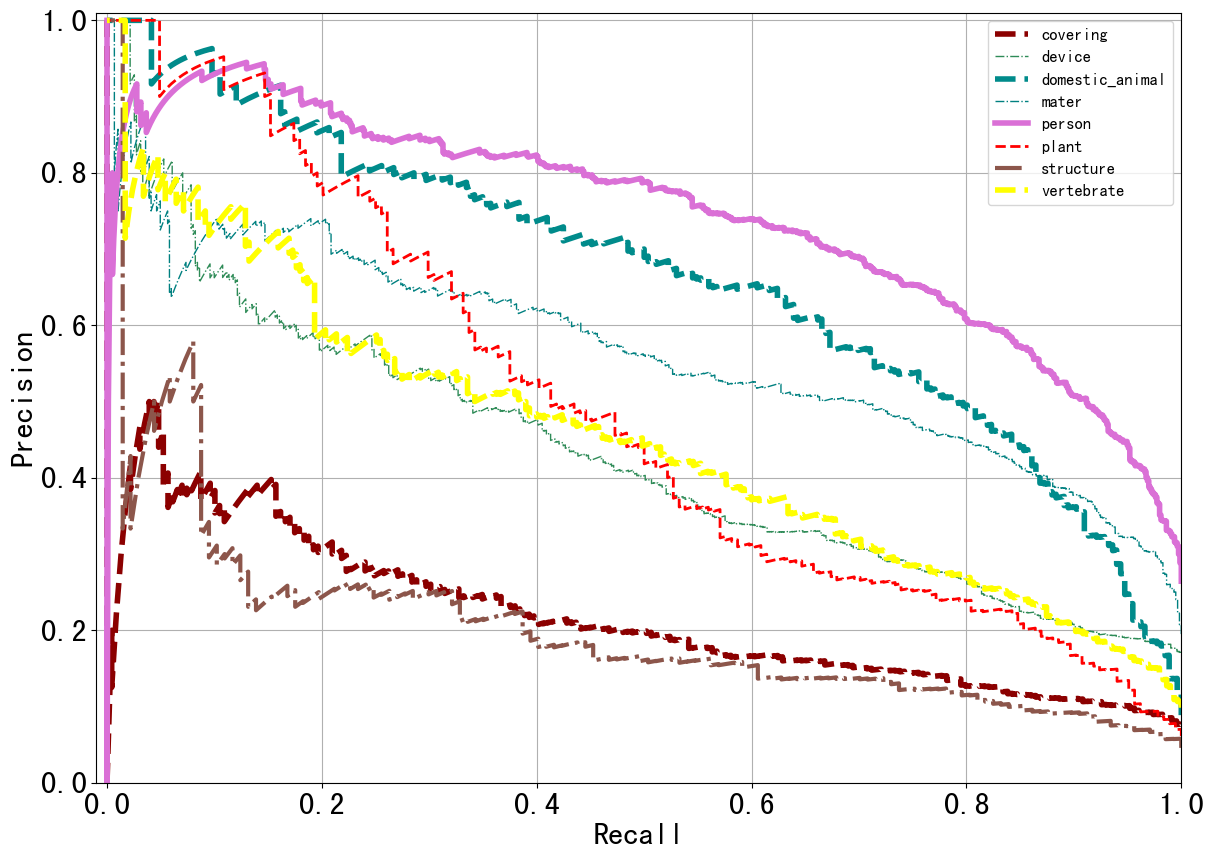

In [36]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
# plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.rcParams['font.size'] = 22
plt.grid(True)

ap_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    AP = average_precision_score(y_test, y_score, average='weighted')
    plt.plot(recall, precision, **get_line_arg(), label=each_class)
    plt.legend()
    ap_list.append(AP)

plt.legend(loc='best', fontsize=12)
plt.savefig(model_path + dataset_name + '-各类别PR曲线.pdf'.format(specific_class), dpi=120, bbox_inches='tight')
plt.show()

## 将AP增加至`各类别准确率评估指标`表格中

In [37]:
df_report = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [38]:
df_report

,类别,precision,recall,f1-score,support,accuracy
0,covering,0.000000,0.000000,0.000000,229.0,0.000000
1,device,0.591837,0.227006,0.328147,511.0,0.227006
2,domestic_animal,0.575851,0.699248,0.631579,266.0,0.699248
3,mater,0.449203,0.770940,0.567653,585.0,0.770940
4,person,0.576792,0.852459,0.688041,793.0,0.852459
5,plant,0.548387,0.369565,0.441558,184.0,0.369565
6,structure,0.444444,0.058394,0.103226,137.0,0.058394
7,vertebrate,0.533742,0.294915,0.379913,295.0,0.294915
8,macro avg,0.465032,0.409066,0.392515,3000.0,0.409066
9,weighted avg,0.498344,0.530667,0.473613,3000.0,0.530667


In [39]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(ap_list)
weighted_avg_auc = sum(ap_list * df_report.iloc[:-2]['support'] / len(df))

In [40]:
ap_list.append(macro_avg_auc)
ap_list.append(weighted_avg_auc)

In [41]:
df_report['AP'] = ap_list

In [42]:
df_report

,类别,precision,recall,f1-score,support,accuracy,AP
0,covering,0.000000,0.000000,0.000000,229.0,0.000000,0.218342
1,device,0.591837,0.227006,0.328147,511.0,0.227006,0.432488
2,domestic_animal,0.575851,0.699248,0.631579,266.0,0.699248,0.664385
3,mater,0.449203,0.770940,0.567653,585.0,0.770940,0.565858
4,person,0.576792,0.852459,0.688041,793.0,0.852459,0.740349
5,plant,0.548387,0.369565,0.441558,184.0,0.369565,0.489737
6,structure,0.444444,0.058394,0.103226,137.0,0.058394,0.206303
7,vertebrate,0.533742,0.294915,0.379913,295.0,0.294915,0.452303
8,macro avg,0.465032,0.409066,0.392515,3000.0,0.409066,0.471221
9,weighted avg,0.498344,0.530667,0.473613,3000.0,0.530667,0.539219


In [43]:
df_report.to_csv(model_path + dataset_name + '-各类别准确率评估指标.csv', index=False)